In [1]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

sns.set(style='whitegrid')

In [2]:
# 2) Define stores and demographics
stores = ['Store_' + str(i) for i in range(1, 21)]  # 20 stores
age_groups = ['0-12', '13-17', '18-24', '25-34', '35-44', '45+']
genders = ['Male', 'Female', 'Other']
income_levels = ['Low', 'Medium', 'High']

In [3]:
# 3) Generate synthetic sales records (daily) for 1 year
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
records = []

for date in date_range:
    for store in stores:
        # random number of transactions per day
        num_tx = np.random.poisson(lam=30)  # avg 30 transactions
        for _ in range(num_tx):
            # sales amount between £5 and £100
            sales = np.random.uniform(5, 100)
            # cost of goods sold as 55-75% of sales
            cogs = sales * np.random.uniform(0.55, 0.75)
            profit = sales - cogs
            profit_margin = profit / sales
            # demographics
            age = np.random.choice(age_groups, p=[0.25,0.15,0.1,0.2,0.15,0.15])
            gender = np.random.choice(genders, p=[0.48,0.48,0.04])
            income = np.random.choice(income_levels, p=[0.3,0.5,0.2])
            records.append({
                'date': date,
                'store': store,
                'sales': round(sales,2),
                'cogs': round(cogs,2),
                'profit': round(profit,2),
                'profit_margin': round(profit_margin,3),
                'age_group': age,
                'gender': gender,
                'income_level': income
            })

df = pd.DataFrame(records)
df.head()

,date,store,sales,cogs,profit,profit_margin,age_group,gender,income_level
0,2024-01-01,Store_1,74.54,49.92,24.62,0.330,0-12,Male,Low
1,2024-01-01,Store_1,87.29,58.50,28.79,0.330,35-44,Male,High
2,2024-01-01,Store_1,84.08,49.82,34.27,0.408,0-12,Male,Medium
3,2024-01-01,Store_1,54.85,34.91,19.94,0.364,13-17,Female,Low
4,2024-01-01,Store_1,32.75,20.41,12.34,0.377,18-24,Female,Low


In [4]:
# 4) Quick summary statistics
print(df[['sales', 'profit', 'profit_margin']].describe())
print('\nTransactions by age group:')
print(df['age_group'].value_counts(normalize=True))

               sales         profit  profit_margin
count  219602.000000  219602.000000  219602.000000
mean       52.494662      18.367098       0.349856
std        27.388420      10.170068       0.057725
min         5.000000       1.260000       0.250000
25%        28.720000       9.780000       0.300000
50%        52.590000      17.880000       0.350000
75%        76.200000      25.950000       0.400000
max       100.000000      44.870000       0.450000

Transactions by age group:
age_group
0-12     0.250221
25-34    0.199638
13-17    0.150226
45+      0.150081
35-44    0.149343
18-24    0.100491
Name: proportion, dtype: float64


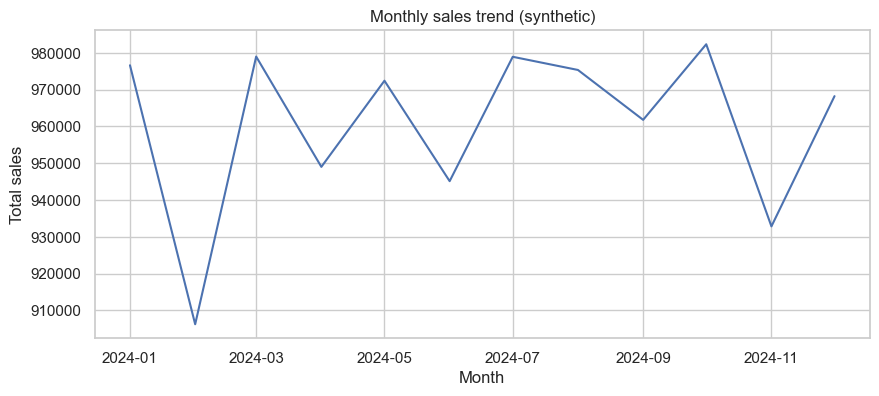

In [5]:
# 5) Trend detection: monthly sales
df['month'] = df['date'].dt.to_period('M')
monthly = df.groupby('month')['sales'].sum().reset_index()
monthly['month'] = monthly['month'].dt.to_timestamp()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='month', y='sales')
plt.title('Monthly sales trend (synthetic)')
plt.ylabel('Total sales')
plt.xlabel('Month')
plt.show()

gender         Female        Male      Other
age_group                                   
0-12       1386360.67  1383866.14  117626.42
13-17       826828.65   826673.06   71700.20
18-24       557643.52   549210.37   48216.38
25-34      1111100.67  1102861.02   91066.36
35-44       820360.88   832924.51   72630.76
45+         821803.15   836773.57   70286.51


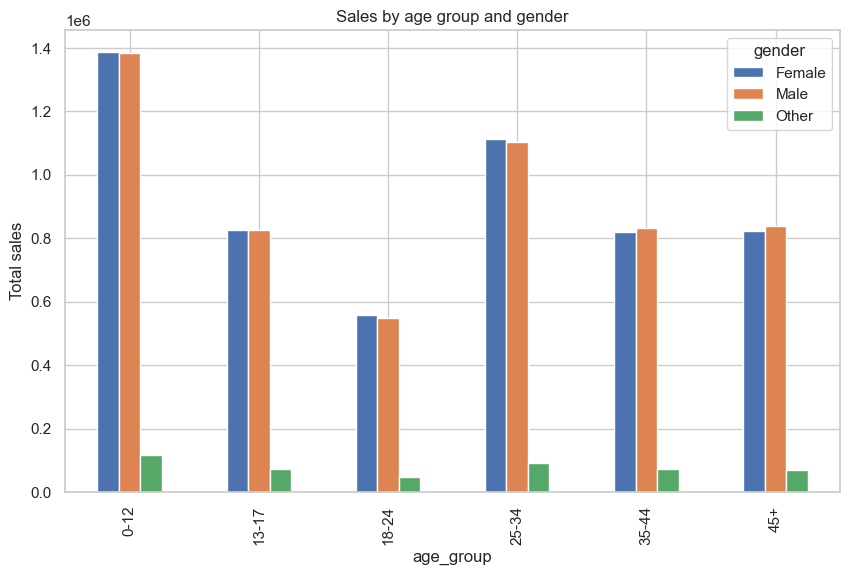

In [6]:
# 7) Customer segments: sales distribution by age group and gender
pivot = df.pivot_table(index='age_group', columns='gender', values='sales', aggfunc='sum')
print(pivot)

pivot.plot(kind='bar', figsize=(10,6))
plt.title('Sales by age group and gender')
plt.ylabel('Total sales')
plt.show()

Top 5 stores by sales:
store
Store_18    588545.89
Store_19    586741.25
Store_1     581473.95
Store_16    580794.97
Store_15    580018.92
Name: sales, dtype: float64


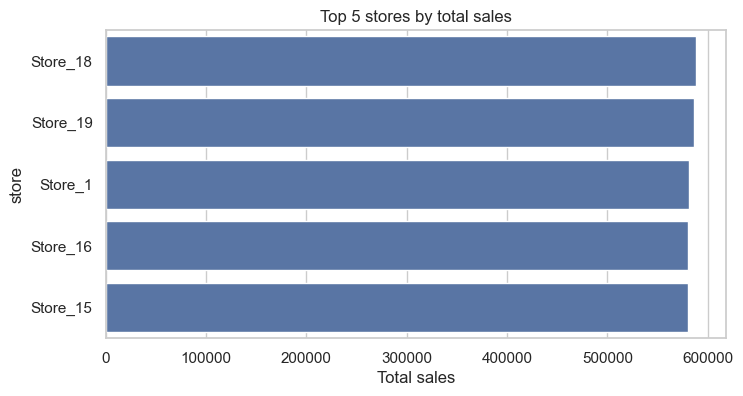

In [7]:
# 8) Store benchmarking: top 5 stores by total sales
store_sales = df.groupby('store')['sales'].sum().sort_values(ascending=False).head(5)
print('Top 5 stores by sales:')
print(store_sales)

plt.figure(figsize=(8,4))
sns.barplot(x=store_sales.values, y=store_sales.index)
plt.title('Top 5 stores by total sales')
plt.xlabel('Total sales')
plt.show()

In [8]:
# 9) Save synthetic dataset to CSV
df.to_csv('synthetic_entertainer_sales.csv', index=False)
print('Saved to synthetic_entertainer_sales.csv')

Saved to synthetic_entertainer_sales.csv
